In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import joblib as joblib

In [2]:
music_data = pd.read_csv("music.csv")
music_data.head()

,Timestamp,gender,age,genre_with_examples,other genres
0,2022/12/09 6:47:22 am CET,1,19,|Amapiano|Ameno by Goya Menor,NaN
1,2022/12/09 6:49:11 am CET,1,18,|Pop|Heat waves by Glass Animals,NaN
2,2022/12/09 6:53:21 am CET,1,19,|Afrobeat|Finesse by Pheelz,NaN
3,2022/12/09 7:07:39 am CET,1,19,|Pop|Heat waves by Glass Animals,NaN
4,2022/12/09 7:09:03 am CET,0,20,|Afrobeat|Finesse by Pheelz,Gospel


In [3]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            54 non-null     object
 1   gender               54 non-null     int64 
 2   age                  54 non-null     int64 
 3   genre_with_examples  54 non-null     object
 4   other genres         12 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [4]:
music_data["genre_with_examples"].value_counts()

|Afrobeat|Finesse by Pheelz                  12
|Rap|Rap God by Eninem                       10
|Spirituals|Silent Night                      8
|Pop|Heat waves by Glass Animals              5
|Music of USA|Stay by Rihanna                 5
|Azonto|Buga by Kizz Daniel                   4
|Reggae|No woman no cry by Bob Marley         3
|Amapiano|Ameno by Goya Menor                 2
|Highlife|I get my day by Elizabeth Tekeh     2
|Ndombolo|Misu na misu by Robinio Mundibu     2
|Bikutsi|Pala Pala by Mani Bella              1
Name: genre_with_examples, dtype: int64

In [5]:
music_data = music_data.drop("other genres", axis="columns")
music_data = music_data.drop("Timestamp", axis="columns")
music_data["genre"] = music_data["genre_with_examples"].str.split("|", expand=True)[1]
music_data = music_data.drop("genre_with_examples", axis="columns")

In [6]:
music_data.head()

,gender,age,genre
0,1,19,Amapiano
1,1,18,Pop
2,1,19,Afrobeat
3,1,19,Pop
4,0,20,Afrobeat


In [7]:
#Splitting
# X = music_data.drop(columns=['genre'])
# y = music_data['genre']

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

In [14]:
# joblib.dump(model, 'music-genre.joblib')

['music-genre.joblib']

In [15]:
model = joblib.load('music-genre.joblib')
predictions = model.predict([[1, 25]])
predictions

/home/d3lia/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Azonto'], dtype=object)

In [17]:
# tree.export_graphviz(model, out_file='music-genre.dot', 
#                     feature_names=['age', 'gender'],
#                     class_names=sorted(y.unique()),
#                     label='all',
#                     rounded=True,
#                     filled=True)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'named_steps'

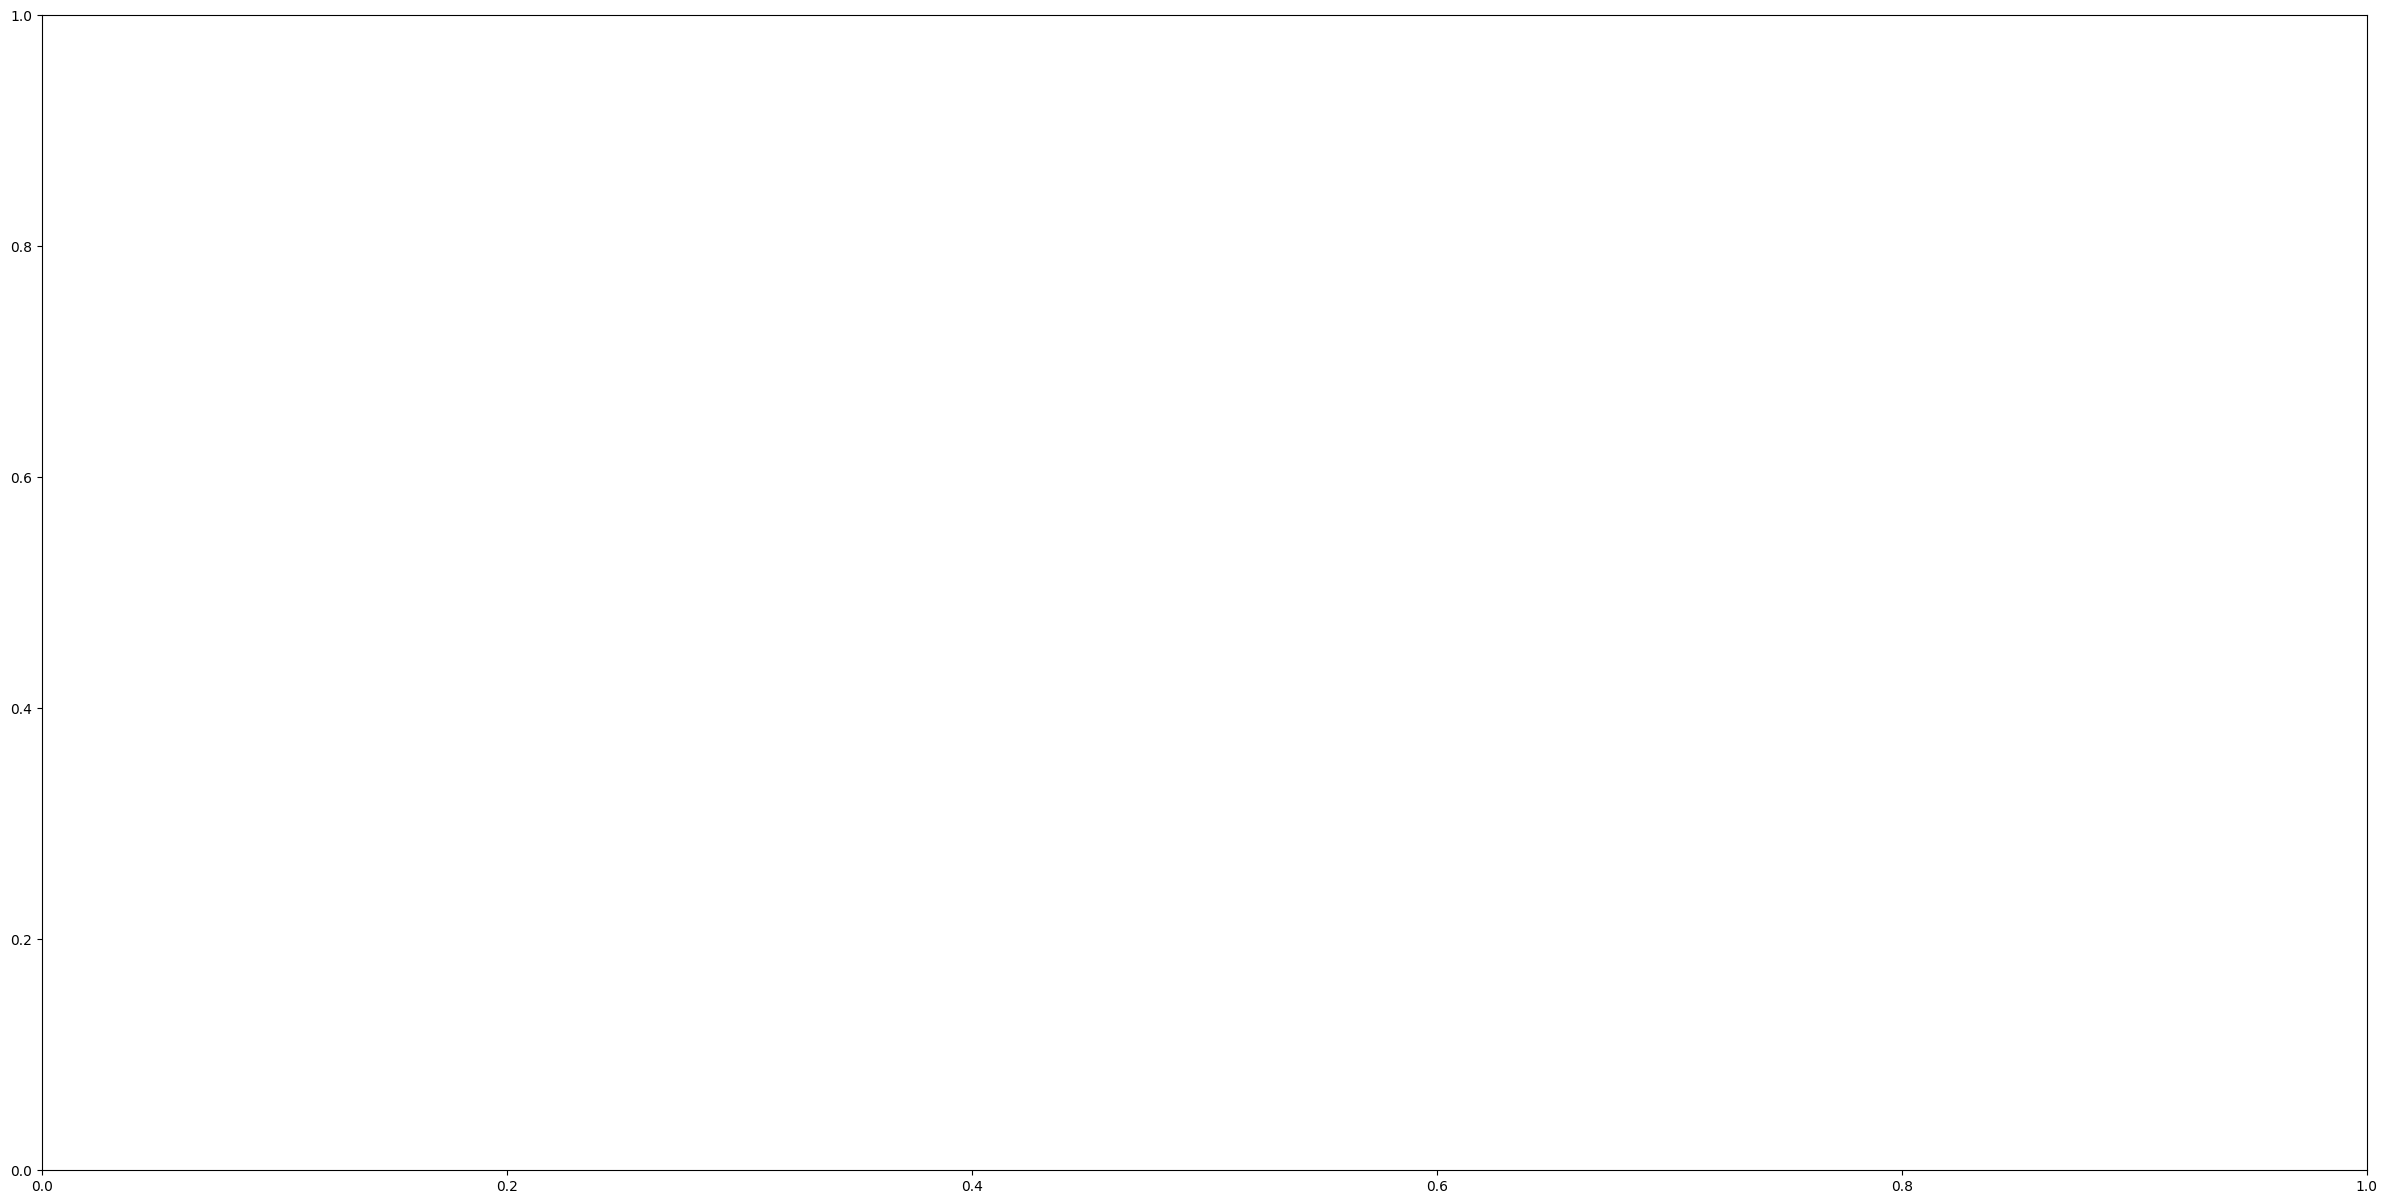

In [21]:
fig, ax = plt.subplots(figsize=(30,15))
#Plot tree
plot_tree( 
    decision_tree = model.named_steps["decisiontreeclassifier"],
    feature_names = X_train.columns,
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=5,
    fontsize=16,
    ax=ax,
);